In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex1data2.txt'
#The column 'x1' and 'y' are significanly larger than the column 'x2', this suggest that we need to scale the data.
data = pd.read_csv(data_path, header=None, names = ["x1","x2", "y"])
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


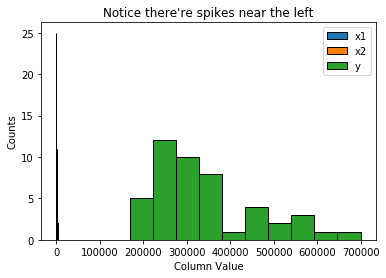

In [3]:
plt.hist(data['x1'], label='x1', edgecolor='black')
plt.hist(data['x2'], label='x2',edgecolor='black')
plt.hist(data['y'], label='y',edgecolor='black')
plt.legend()
plt.title("Notice there're spikes near the left")
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.show()

In [4]:
# Normalizing data (feature scaling)

data_norm = (data-data.mean())/data.std()
data_norm.describe()

,x1,x2,y
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [5]:
data_norm.head()

,x1,x2,y
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


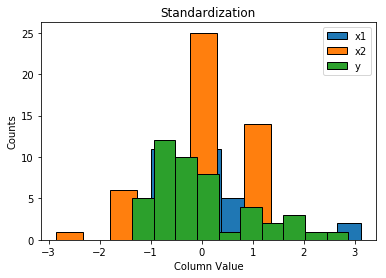

In [6]:
plt.hist(data_norm['x1'], label='x1', edgecolor='black')
plt.hist(data_norm['x2'], label='x2',edgecolor='black')
plt.hist(data_norm['y'], label='y',edgecolor='black')
plt.legend()
plt.title("Standardization")
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.show()

In [7]:
#Loading Data
x = data_norm[data_norm.columns[0:data_norm.shape[1]-1]]
y = data_norm['y']
# convert to np.array
x = x.values
y = y.values.reshape(-1,1)

In [8]:
X = np.insert(x, 0, 1, axis=1)

In [10]:
# Hypothesis function
# X is mx(n+1), theta is (n+1)x1
# Hypothesis function for i-th instance
# \begin{align}\ h_\theta \left( x^{\left( i \right)} \right)= x^{\left( i \right)}\theta\end{align}

# Hypothesis function (vectorized)
# \begin{align}\ h_\theta \left( X \right)= X\theta \end{align}

In [11]:
def h(X,theta):
    return X.dot(theta)

In [ ]:
### Cost function
m = y.shape[0]
def Cost(theta,X,y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)